<a href="https://colab.research.google.com/github/samanviArcot/NLP/blob/main/NLPAissgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1. Convert the above paragraph into vectors using:
#given paragraph
para='''paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin 
and end, and thus help the reader see the organization of the essay and grasp its main points.

Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point.  It  might  describe  a  place like kolkata,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into 
categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One 
of the most important of these is a topic sentence.'''
import numpy as np
import nltk
import re
import gensim
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim import corpora,models,similarities
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#i) using Word2vec:
def convert_to_sentences(para):
    to= nltk.data.load('tokenizers/punkt/english.pickle')
    rawsen = to.tokenize(para.strip())
    sen= []
    for raw_sentence in rawsen:
        if len(raw_sentence) > 0:
            sen.append((raw_sentence))
    return sen

sentences=convert_to_sentences(para)
print(sentences)
word=[nltk.word_tokenize(sent) for sent in sentences]
from nltk.corpus import stopwords
nltk.download('stopwords')
st=list(set(stopwords.words("english")))
for i in word:
  for j in i:
    if j in st:
      i.remove(j)
    elif len(j)==1:
      i.remove(j)
model=gensim.models.Word2Vec(word,min_count=1,size=32)
print(model['paragraph'])


['paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.', 'Almost  every  piece  of  writing  you  do  that  is \nlonger  than  a  few  sentences  should  be  organized  into  paragraphs.', 'This  is because paragraphs show a reader where the subdivisions of an essay begin \nand end, and thus help the reader see the organization of the essay and grasp its main points.', 'Paragraphs  can  contain  many  different  kinds  of  information.', 'A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a \ngeneral  point.', 'It  might  describe  a  place like kolkata,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into \ncategories;  or  describe  causes  and  effects.', 'Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics.', 'One \nof the most important of these is a topic sentence

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [9]:
#ii) USE
import tensorflow_hub as hub
use= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#converting to vectors
embeddings=use(sentences)
print(embeddings)
print("shape= ",embeddings[0].shape)
#each sentence is converted into vector having 512 values
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings[0]))

tf.Tensor(
[[ 0.0130397  -0.02448178  0.05377616 ... -0.08659647  0.01437556
   0.04036802]
 [ 0.02902018 -0.00415597  0.07664446 ... -0.06830524 -0.00835191
   0.04397805]
 [ 0.07023076 -0.02952436  0.04878015 ... -0.06741599  0.02838855
   0.06126793]
 ...
 [ 0.04487116 -0.0484449   0.05696819 ... -0.06665879  0.03268223
   0.03346183]
 [ 0.04141247  0.0258891  -0.00625629 ... -0.0216299   0.00910816
   0.03623573]
 [ 0.00255486 -0.05832284  0.01486255 ... -0.09906971 -0.07840379
   0.06731212]], shape=(8, 512), dtype=float32)
shape=  (512,)
The sentence:  paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 is converted as : 
[ 0.0130397  -0.02448178  0.05377616  0.09029772 -0.00281371 -0.01281828
  0.03285866  0.01635625 -0.06859536  0.06464799 -0.00420633 -0.00475263
 -0.0616823   0.02333648 -0.0740284  -0.09213066 -0.04730163  0.03868826
 -0.09117856 -0.0531873   0.0045717   0.06571639 -0.00334152  0.05408446
 -0.024773

In [11]:
#iii)ELMO
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
#1024 sized vectors
elmo=hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)
embeddings=elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
print("\n\n")
print(sess.run(embeddings[0]))
print("shape=",embeddings[0].shape)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.





[[ 0.12622021  0.43023553  0.4043871  ...  0.22031897  0.26976916
   0.46307242]
 [-0.0062146   0.333897    0.10469673 ... -0.6755089   0.25390008
   0.654027  ]
 [ 0.00899898  0.4038667   0.13564664 ... -0.04539599  0.19543737
  -0.34905794]
 ...
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]]
shape= (32, 1024)


In [13]:
pip install transformers

     |████████████████████████████████| 3.1 MB 35.4 MB/s 
     |████████████████████████████████| 895 kB 41.7 MB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
     |████████████████████████████████| 3.3 MB 45.5 MB/s 
     |████████████████████████████████| 59 kB 7.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 5.6 MB/s 
     |████████████████████████████████| 1.2 MB 37.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=b3a38881d123e1d5e3f4b942fc9446ca06ab6e3bec586e4555b3f48c6cf6a357
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [3]:
#iv) GP2
import torch
import transformers
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
output=gptokenizer.encode(para,add_special_tokens=False,return_tensors="pt")
print("shape=",output.shape)
output

shape= torch.Size([1, 256])


tensor([[20360,   318,   257,  2168,   286, 13439,   326,   389,  8389,   290,
         24870,    11,   290,   389,   477,   220,  3519,   220,   284,   220,
           257,   220,  2060,   220,  7243,    13,   220, 16699,   220,   790,
           220,  3704,   220,   286,   220,  3597,   220,   345,   220,   466,
           220,   326,   220,   318,   220,   198,  6511,   263,   220,   621,
           220,   257,   220,  1178,   220, 13439,   220,   815,   220,   307,
           220,  8389,   220,   656,   220, 23549,    13,   220,   770,   220,
           318,   780, 23549,   905,   257,  9173,   810,   262, 45944,  3279,
           286,   281, 14268,  2221,   220,   198,   392,   886,    11,   290,
          4145,  1037,   262,  9173,   766,   262,  4009,   286,   262, 14268,
           290, 13180,   663,  1388,  2173,    13,   198,   198, 10044,  6111,
            82,   220,   460,   220,  3994,   220,   867,   220,  1180,   220,
          6982,   220,   286,   220,  1321,    13,  

In [10]:
#v) Sentence-BERT
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings2=bert(sentences)
print(embeddings2)
print("shape=",embeddings2[0].shape)
#each sentence is converted into vector having 128 values
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings2[0]))


tf.Tensor(
[[ 0.5779494   0.02082791  0.09225276 ...  0.1423439   0.0289949
  -0.15707761]
 [ 0.5166956   0.00863559  0.13047293 ...  0.06873029  0.04432377
   0.02298209]
 [ 0.7741569   0.20155099 -0.06426485 ... -0.15599789  0.10988081
   0.10273374]
 ...
 [ 0.49916965 -0.00334622  0.08184471 ...  0.05571959 -0.09832127
  -0.04315813]
 [ 0.2909918   0.06627773  0.08403497 ... -0.10017543 -0.11646989
   0.00867226]
 [ 0.3799187  -0.05745781  0.09742597 ...  0.0461409  -0.07855327
   0.03973798]], shape=(8, 128), dtype=float32)
shape= (128,)
The sentence:  paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 is converted as : 
[ 5.77949405e-01  2.08279062e-02  9.22527611e-02  4.76201549e-02
 -1.17820695e-04 -7.91035891e-02 -9.09532905e-02 -1.96999479e-02
 -1.82167172e-01  1.82781354e-01  1.78407803e-02 -1.36595681e-01
 -1.20970421e-01  3.03527750e-02 -1.55288994e-01 -3.65624130e-02
 -8.87916684e-02  1.18960990e-02 -2.42571995

In [5]:
#2. Find named entities (NER) for the above paragraph?
import spacy
from spacy import displacy
ner=spacy.load('en')
result=ner(para)
for word in result.ents:
  print(word.text,word.label_)
print(spacy.explain('GPE'))
#better visualisation of entity recognition
print(displacy.render(result,style="ent",jupyter=True))
resultss=ner("Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.")
for word in resultss.ents:
  print(word.text,word.label_)
print(displacy.render(resultss,style="ent",jupyter=True))


kolkata PERSON
two CARDINAL
One CARDINAL
Countries, cities, states


None
two CARDINAL
One CARDINAL


None


In [10]:
#3. Find similar sentences(repeated sentences) from the above paragraph?
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
se_embeddings = sbert_model.encode(sentences)
q1_vec= sbert_model.encode(sentences[0])
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
for sent in sentences:
  sim = cosine(q1_vec, sbert_model.encode([sent])[0])
  if sim>0.6:
    print("Sentence1 =",sentences[0],"\n \nSentence2=", sent, "\n\nsimilarity = ", sim,end="\n ----------------------------- \n")

Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 

similarity =  1.0
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs. 

similarity =  0.64265954
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point. 

similarity =  0.6779764
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are or

**4. Explain POS tagging with HMM?**


**POS TAGGING:**

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.
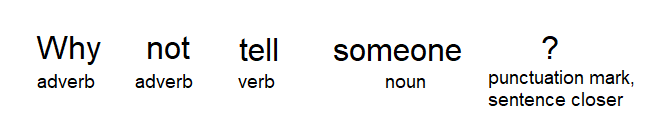

In Figure 1, we can see each word has its own lexical term written underneath, however, having to constantly write out these full terms when we perform text analysis can very quickly become cumbersome — especially as the size of the corpus grows. Thence, we use a short representation referred to as “tags” to represent the categories.
As earlier mentioned, the process of assigning a specific tag to a word in our corpus is referred to as part-of-speech tagging (POS tagging for short) since the POS tags are used to describe the lexical terms that we have within our text.

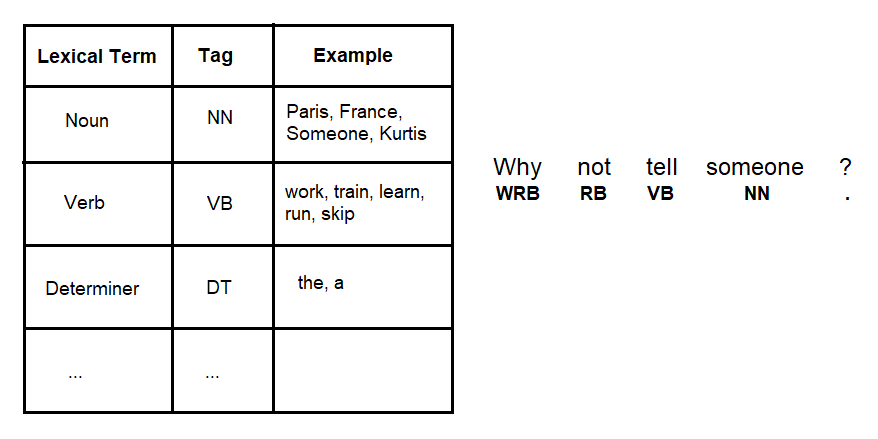

Part-of-speech tags describe the characteristic structure of lexical terms within a sentence or text, therefore, we can use them for making assumptions about semantics. Other applications of POS tagging include:
Named Entity Recognition
Co-reference Resolution
Speech Recognition
When we perform POS tagging, it’s often the case that our tagger will encounter words that were not within the vocabulary that was used. Consequently, augmenting your dataset to include unknown word tokens will aid the tagger in selecting appropriate tags for those words.

**why do we need POS Tagging:** 

These tags reveal a lot about a word and its neighbors. Knowing whether a word is a noun or a verb tells us about likely neighboring words (nouns are preceded by determiners and adjectives, verbs by nouns).
Gives an idea about syntactic structure (nouns are generally part of noun phrases), hence helping in text parsing(the process of determining the syntactic structure of a text by analyzing its constituent words based on an underlying grammar).
Parts of speech are useful features for labeling named entities like people or organizations (Mumbai in ‘Mumbai is the city of dreams’)in information extraction , or for coreference resolution (relating he to Ram in ‘Ram is a boy. He is handsome’).
A word’s part of speech can even play a role in speech recognition or synthesis, e.g., the word content is pronounced CONtent when it is a noun and conTENT when it is an adjective.

**Hidden Markov Model:**

Hidden Markov Model (HMM) is a statistical Markov model in which the system being modeled is assumed to be a Markov process with unobservable (“hidden”) states (Source: Wikipedia). In our case, the unobservable states are the POS tags of a word.
If we rewind back to our Markov Model in Figure 5, we see that the model has states for part of speech such as VB for verb and NN for a noun. We may now think of these as hidden states since they are not directly observable from the corpus. Though a human may be capable of deciphering what POS applies to a specific word, a machine only sees the text, hence making it observable, and is unaware of whether that word POS tag is noun, verb, or something else which in-turn means they are unobservable.
Both the Markov Model and Hidden Markov model have transition probabilities that describe the transition from one hidden state to the next, however, the Hidden Markov Model also has something known as emission probabilities.
The emission probabilities describe the transitions from the hidden states in the model — remember the hidden states are the POS tags — to the observable states — remember the observable states are the words.
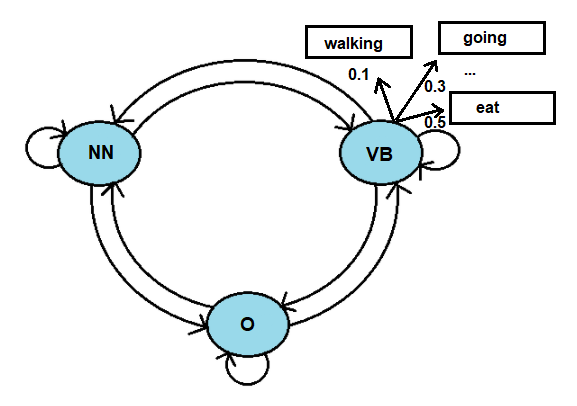
In Figure 14 we see that for the hidden VB state we have observable states. The emission probability from the hidden states VB to the observable eat is 0.5 hence there is a 50% chance that the model would output this word when the current hidden state is VB.
We can also represent the emission probabilities as a table…
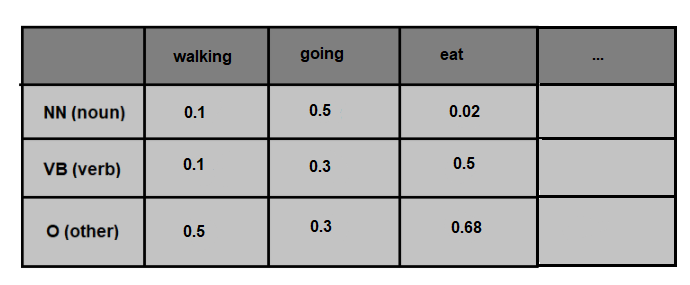

Similar to the transition probability matrix, the row values must sum to 1. Also, the reason all of our POS tags emission probabilities are more than 0 since words can have a different POS tag depending on the context.
To populate the emission matrix, we’d follow a procedure very similar to the way we’d populate the transition matrix. We’d first count how often a word is tagged with a specific tag.

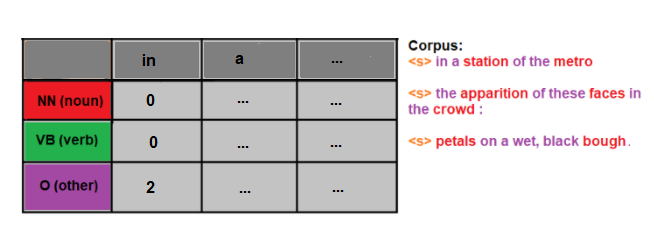

Since the process is so similar to calculating the transition matrix, I will instead provide you with the formula with smoothing applied to see how it would be calculated.

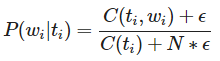